In [1]:
import os
os.chdir('../')
import numpy as np
import pandas as pd
from interface.apis import KGFarm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

RANDOM_STATE = 7
kgfarm = KGFarm()
np.random.seed(RANDOM_STATE)

KGFarm is running in HUMAN-IN-THE-LOOP mode!


## Load dataset as a Dataframe
(for this tutorial we use the <a href='https://www.kaggle.com/c/titanic'>Titanic</a> dataset from <a href='https://www.kaggle.com/'>Kaggle</a>)

In [2]:
df = kgfarm.load_titanic_dataset()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Cleaning recommendations 

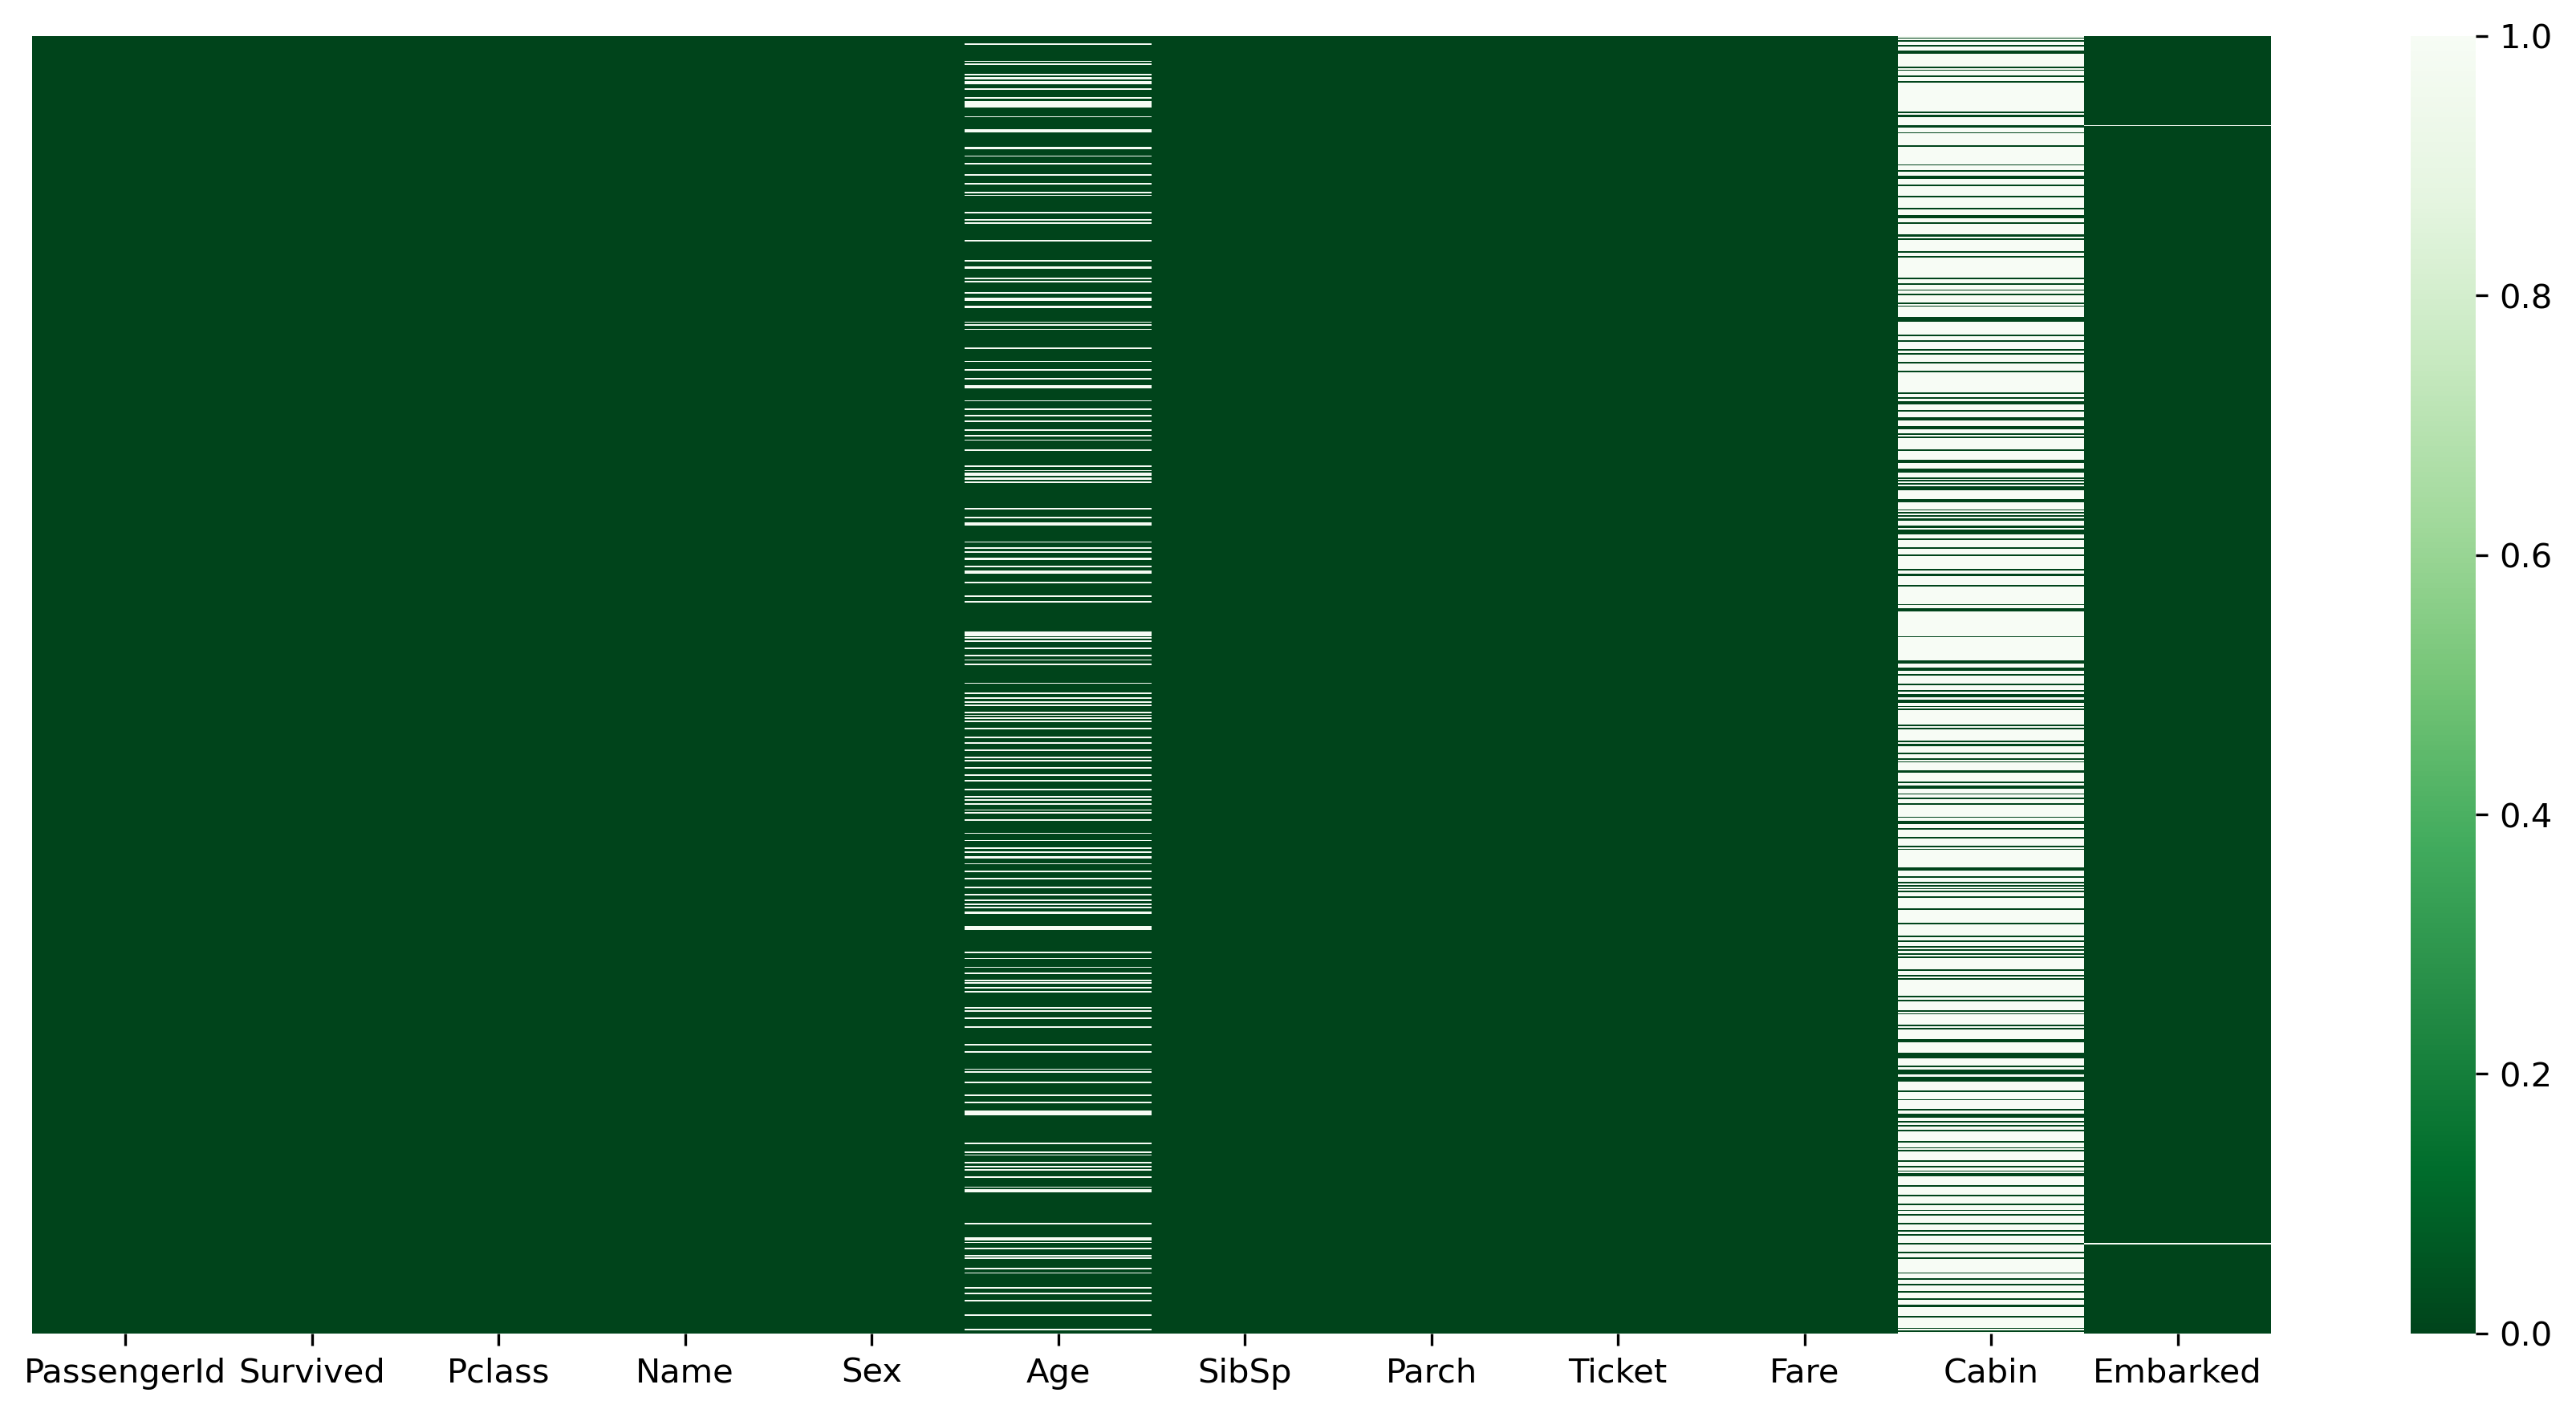

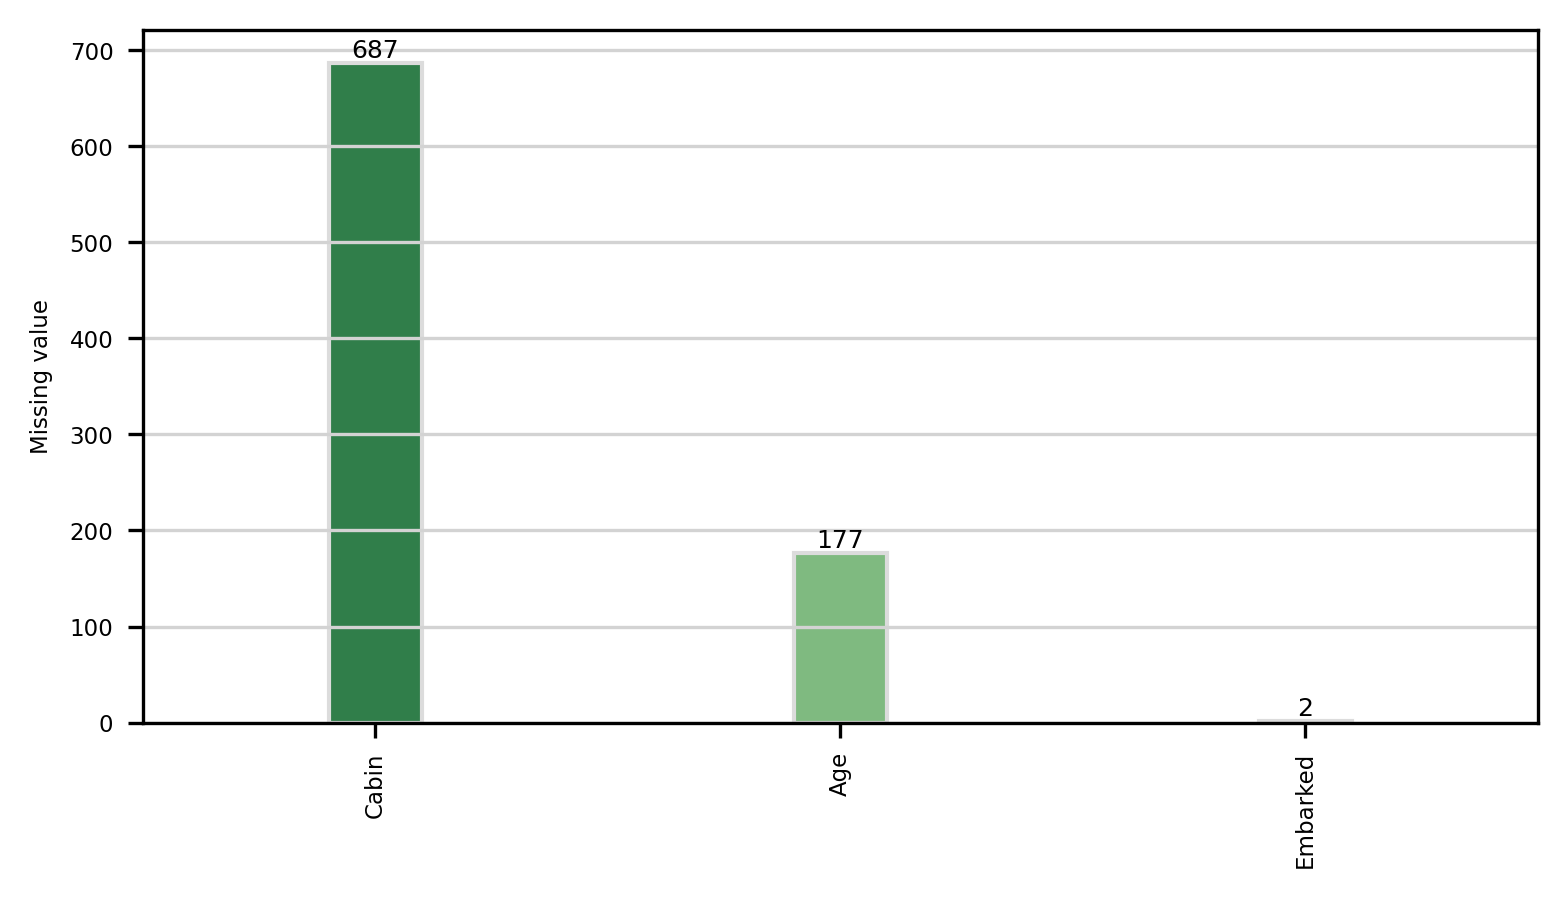

1/1 [==============================] - 1s 607ms/step


,Recommended_operation,Confidence
0,Fill,0.69
1,Interpolate,0.31
2,Impute,0.30


In [3]:
cleaning_info = kgfarm.recommend_cleaning_operations(df)
cleaning_info

## Clean data directly using KGFarm (no explicit code needed)

In [4]:
df = kgfarm.clean(df=df, recommendation=cleaning_info.iloc[0])
df

cleaning by Fill


  0%|          | 0/3 [00:00<?, ?it/s]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


## Seperate independent (features or 'X') and dependent variable (target or 'y') 

In [5]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


## Use KGFarm for Data Transformation recommendations

In [6]:
transformation_info = kgfarm.recommend_transformations(X=X)
transformation_info

,Feature,Recommended_transformation,Transformation_type
0,"[Cabin, Embarked, Name, Sex, Ticket]",OrdinalEncoder,categorical
1,"[PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]",StandardScaler,scaling
2,"[Age, Fare, PassengerId, Pclass]",Log,unary


## Applying transformations directly using KGFarm (no explicit code needed)
It is recommended to apply categorical transformations followed by scaling and unary transformations

In [7]:
X, encoder = kgfarm.apply_transformations(X=X, recommendation=transformation_info.iloc[0])
X

Applying OrdinalEncoder on ['Cabin', 'Embarked', 'Name', 'Sex', 'Ticket']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108.0,1.0,22.000000,1,0,523.0,7.2500,47.0,2.0
1,2,1,190.0,0.0,38.000000,1,0,596.0,71.2833,81.0,0.0
2,3,3,353.0,0.0,26.000000,0,0,669.0,7.9250,47.0,2.0
3,4,1,272.0,0.0,35.000000,1,0,49.0,53.1000,55.0,2.0
4,5,3,15.0,1.0,35.000000,0,0,472.0,8.0500,47.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548.0,1.0,27.000000,0,0,101.0,13.0000,47.0,2.0
887,888,1,303.0,0.0,19.000000,0,0,14.0,30.0000,30.0,2.0
888,889,3,413.0,0.0,29.699118,1,2,675.0,23.4500,47.0,2.0
889,890,1,81.0,1.0,26.000000,0,0,8.0,30.0000,60.0,0.0


In [8]:
X, scaler = kgfarm.apply_transformations(X=X, recommendation=transformation_info.iloc[1])
X

Applying StandardScaler on ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.730108,0.827377,-1.310217,0.737695,-0.592481,0.432793,-0.473674,0.918966,-0.502445,-0.281881,0.585954
1,-1.726220,-1.566107,-0.991410,-1.355574,0.638789,0.432793,-0.473674,1.282625,0.786845,1.161545,-1.942303
2,-1.722332,0.827377,-0.357685,-1.355574,-0.284663,-0.474545,-0.473674,1.646283,-0.488854,-0.281881,0.585954
3,-1.718444,-1.566107,-0.672604,-1.355574,0.407926,0.432793,-0.473674,-1.442322,0.420730,0.057748,0.585954
4,-1.714556,0.827377,-1.671790,0.737695,0.407926,-0.474545,-0.473674,0.664904,-0.486337,-0.281881,0.585954
...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,0.400452,0.737695,-0.207709,-0.474545,-0.473674,-1.183277,-0.386671,-0.281881,0.585954
887,1.718444,-1.566107,-0.552079,-1.355574,-0.823344,-0.474545,-0.473674,-1.616678,-0.044381,-1.003594,0.585954
888,1.722332,0.827377,-0.124412,-1.355574,0.000000,0.432793,2.008933,1.676173,-0.176263,-0.281881,0.585954
889,1.726220,-1.566107,-1.415189,0.737695,-0.284663,-0.474545,-0.473674,-1.646568,-0.044381,0.270017,-1.942303


In [9]:
X, u_transformation = kgfarm.apply_transformations(X=X, recommendation=transformation_info.iloc[2])
X

Applying Log on ['Age', 'Fare', 'PassengerId', 'Pclass']


  0%|          | 0/4 [00:00<?, ?it/s]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-9.210340,0.872792,-1.310217,0.737695,0.507284,0.432793,-0.473674,0.918966,-1.923625,-0.281881,0.585954
1,-5.524495,-9.210340,-0.991410,-1.355574,1.061964,0.432793,-0.473674,1.282625,0.361421,1.161545,-1.942303
2,-4.843965,0.872792,-0.357685,-1.355574,0.677319,-0.474545,-0.473674,1.646283,-1.834662,-0.281881,0.585954
3,-4.442741,-9.210340,-0.672604,-1.355574,0.978770,0.432793,-0.473674,-1.442322,0.066959,0.057748,0.585954
4,-4.157186,0.872792,-1.671790,0.737695,0.978770,-0.474545,-0.473674,0.664904,-1.819022,-0.281881,0.585954
...,...,...,...,...,...,...,...,...,...,...,...
886,1.236856,0.179686,0.400452,0.737695,0.715665,-0.474545,-0.473674,-1.183277,-1.339980,-0.281881,0.585954
887,1.237984,-9.210340,-0.552079,-1.355574,0.357613,-0.474545,-0.473674,-1.616678,-0.503948,-1.003594,0.585954
888,1.239110,0.872792,-0.124412,-1.355574,0.812376,0.432793,2.008933,1.676173,-0.750229,-0.281881,0.585954
889,1.240236,-9.210340,-1.415189,0.737695,0.677319,-0.474545,-0.473674,-1.646568,-0.503948,0.270017,-1.942303


## Select subset of features for predicting target (if needed)
this is recommended for datasets with > 100 features

In [10]:
features = kgfarm.recommend_features_to_be_selected(task='binary', X=X, y=y)
X = X[features['Feature']]

## Split data into Train and Test sets 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

## Train & Evaluate model performance 

In [12]:
model = RandomForestClassifier(random_state=RANDOM_STATE)
model.fit(X_train, y_train)
print(f'Accuracy: {model.score(X_test, y_test)*100:.1f}%')

Accuracy: 81.0%
